<a href="https://colab.research.google.com/github/jotix16/Machine-Learning/blob/master/Svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy , random , math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
def solve(N,C=11):
    '''
    Solves the optimization problem for SVM (!! no slack variables yet)
    '''
    constraint={'type':'eq', 'fun':zerofun}
    ret = minimize(objective , numpy.zeros([N,1]), bounds=[(0,None) for b in range(N)],constraints=constraint)
    alpha = ret['x']
    return alpha

In [3]:
def kernel(x1,x2):
    '''
    Calculates one of three kernels for a pair of vectors.
    (linear, polynomial and radial_basis)
    '''
    
    global kernel_type, p, sigma
    if kernel_type == "polynomial":
        res = numpy.power((x1.dot(x2)+1),p)

    elif kernel_type ==  "radial_basis":
        res = numpy.exp(-0.5*numpy.linalg.norm(x1-x2)/sigma)

    else:
        res = x1.dot(x2);

    return res

In [4]:
def objective(a):
    '''
    Dual function to be minimized
    '''
    global P
    a = a.reshape(len(a),1)
    return 0.5*numpy.sum(a.dot(a.T)*P) - numpy.sum(a)
    

In [5]:
def zerofun(a):
    '''
    Encodes the equality constraint for the optimization problem
    '''
    global targets
    return a.dot(targets)
    

In [6]:
def indicator(s):
    '''
    Returns the class point s is classified to
    '''
    global targets, inputs, b
    res = numpy.sum([a[i]*targets[i]*kernel(s,inputs[i,:]) for i in range(len(a))])
    
    if int(res-b):
        return 1
    return -1

In [7]:
def calc_b(a,targets,inputs):
    '''
    Calculates b after we have optimized for a
    '''
    index = numpy.argmax(a)
    s = inputs[index,:]
    ts = targets[index]
    b = numpy.sum([a[i]*targets[i]*kernel(s,inputs[i,:]) for i in range(len(a))])
    return b

In [8]:
def draw_counture():
    '''
    Draws the conture that seperates the data based on SVM
    '''
    xgrid = numpy.linspace(-2,2)
    ygrid = numpy.linspace(-2,2)
    grid = numpy.array([[indicator(numpy.array([x,y])) for x in xgrid] for y in ygrid ])
    plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red','black','blue'), linewidths=(1,3,1))

In [9]:
def generate_data():
    classA = numpy.concatenate((numpy.random.randn(20,2) * 0.2 + [0.7,0.5],numpy.random.randn(20,2) * 0.2 + [-1,0.5]))
    classB = numpy.random.randn(20,2) * 0.2 + [0.0,0.5]
    
    inputs = numpy.concatenate((classA,classB))
    targets = numpy.concatenate((numpy.ones(classA.shape[ 0 ] ) ,-numpy.ones(classB.shape[0])))
    
    # Permute
    N = inputs.shape[0] # Number of rows (samples)
    permute=list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute,:]
    targets = targets [permute]
    
    return classA, classB, inputs, targets

In [10]:
global kernel_type, p, sigma, inputs, targets, P, b
# Kernel parameters
# kernel_type = "linear"
# kernel_type = "polynomial"
kernel_type = "radial_basis"
p = 4
sigma = 5

# Generated data
classA,classB,inputs,targets = generate_data() # generate data
targets = targets.reshape(len(targets),1)

# Calculate matrix P
P = numpy.array([[kernel(x_1,x_2) for x_1 in inputs] for x_2 in inputs])
P = P * targets.dot(targets.T)

# Solve
a = solve(inputs.shape[0])
b = calc_b(a,targets,inputs)


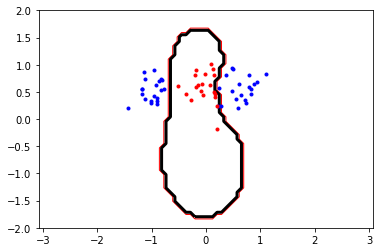

In [11]:
# Plot the data
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

# Draw the conture
draw_counture()
plt.axis('equal')   # Force same scale on both axes
#plt.savefig('svmplot.pdf')   # Save a copy in a file
plt.show() # Show the plot on the screen